## Загрузка библиотек

In [437]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [438]:
def read_covid_dataset(path_to_csv):
    '''
    Возвращает пару из X и y.
    X - массив векторов
    y - соответствующие векторам метки
    '''
    data = pd.read_csv(path_to_csv,
                      parse_dates=['date'])
    X = data
    y = None
    
    return X, y


def read_hr_dataset(path_to_csv):
    '''
    Возвращает пару из X и y.
    X - массив векторов
    y - соответствующие векторам метки
    '''
    data = pd.read_csv(path_to_csv, index_col='enrollee_id')
    X = data.drop('target', axis=1)
    y = data.target.astype(np.uint8)
    
    return X, y

In [439]:
COVID_DATA_PATH = './hw1_data/covid.csv'
HR_DATA_PATH = './hw1_data/hr.csv'

In [440]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.  (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

In [442]:
def is_numeric(series):
    return np.issubdtype(series, np.number) or np.issubdtype(series, np.datetime64)

In [443]:
numeric_features = X_hr.apply(is_numeric)

numeric_cols = X_hr.columns[numeric_features]
categorical_cols = X_hr.columns[-numeric_features]

In [518]:
# Numeric features processing

def numeric_features_statistic(X, numeric_cols):
    n = len(numeric_cols)
    fig, axes = plt.subplots(
        nrows=n,
        ncols=1,
        figsize=(10, 6*n)
    )
    i = 0
    for feature in numeric_cols:
        ax = axes[i] if n > 1 else axes
        ax.set_title(feature, fontsize=20)
        ax.set_xlabel('value')
        sns.histplot(X[feature], ax=ax)
        i += 1

    plt.show()

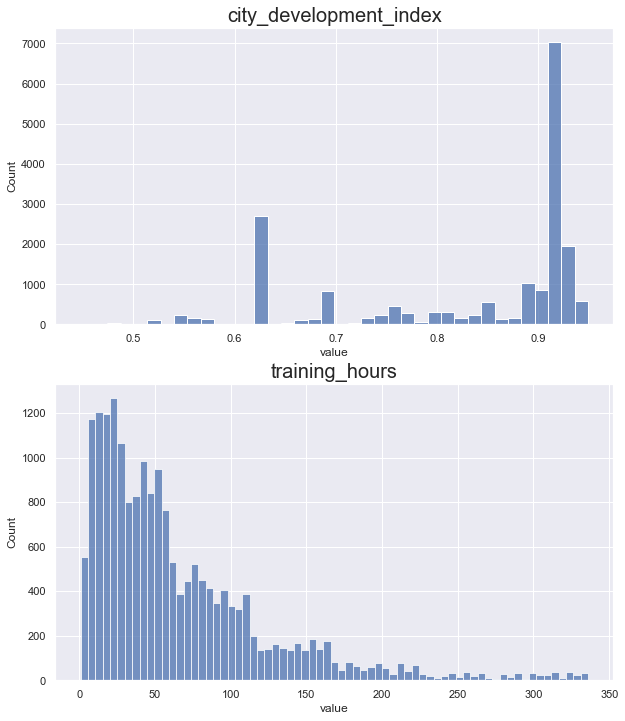

In [519]:
numeric_features_statistic(X_hr, numeric_cols)

In [506]:
# Not numeric features processing

def categorical_features_statistic(X, categorical_cols):
    
    for feature in categorical_cols:
        print(feature)

        col_data = X[feature]
        not_na_col_data = col_data[-col_data.isna()]

        unique_names, unique_counts = np.unique(not_na_col_data, return_counts=True)
        unique_elements = zip(unique_names, unique_counts)
        unique_elements = sorted(unique_elements, key=lambda x: -x[1])
        max_len = len(max(unique_names, key=lambda x: len(x)))

        for elem in unique_elements:
            print(f'\t{elem[0]:{max_len}s}:   {elem[1]}')

        print(f'\n\t{"NaN":{max_len}s}:   {sum(col_data.isna())}\n\n')

In [507]:
categorical_features_statistic(X_hr, categorical_cols)

city
	city_103:   4355
	city_21 :   2702
	city_16 :   1533
	city_114:   1336
	city_160:   845
	city_136:   586
	city_67 :   431
	city_75 :   305
	city_102:   304
	city_104:   301
	city_73 :   280
	city_100:   275
	city_71 :   266
	city_11 :   247
	city_61 :   197
	city_90 :   197
	city_28 :   192
	city_23 :   182
	city_65 :   175
	city_36 :   160
	city_173:   151
	city_83 :   143
	city_50 :   140
	city_116:   128
	city_162:   128
	city_46 :   128
	city_138:   120
	city_19 :   119
	city_64 :   114
	city_45 :   113
	city_74 :   104
	city_97 :   104
	city_57 :   103
	city_149:   102
	city_159:   94
	city_99 :   94
	city_128:   92
	city_41 :   89
	city_10 :   86
	city_165:   82
	city_105:   79
	city_123:   79
	city_98 :   79
	city_101:   75
	city_40 :   68
	city_89 :   67
	city_150:   65
	city_145:   63
	city_24 :   62
	city_115:   54
	city_142:   53
	city_152:   51
	city_76 :   50
	city_158:   49
	city_13 :   48
	city_27 :   47
	city_91 :   45
	city_70 :   44
	city_134:   43
	city_143:   

#### 2.  (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [446]:
print(f'Исходный размер датасета hr {X_hr.shape[0]}')
X_hr_dropna = X_hr.dropna()
print(f'Pазмер датасета covid без NaN {X_hr_dropna.shape[0]}')

Исходный размер датасета hr 19158
Pазмер датасета covid без NaN 8955


Давайте попробуем избежать сокращения размера датасета.

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

Исключим наименее информативные строки в количестве не превышающем 15% датасета:

In [447]:
def drop_na(X, y, max_drop_prop=0.15):
    
    Data = pd.concat([X, y], axis=1)
    
    # Choosing the optimal treshold
    treshold = Data.shape[1]
    while Data.dropna(thresh=treshold).shape[0] / Data.shape[0] < 1 - max_drop_prop:
        treshold -= 1
        
    Data_dropna = Data.dropna(thresh=treshold)
    
    X_dropna = Data_dropna.drop(columns=y.name)
    y_dropna = Data_dropna[y.name]
    
    return X_dropna, y_dropna

In [448]:
X_hr_dropna, y_hr_dropna = drop_na(X_hr, y_hr)

<b style='color:blue'>Я конечно напишу код, который должен выполнять поставленную задачу, но в числовых признаках нет пропущенных значений, так что код этот будет скучать(</b>

In [449]:
X_hr_fill = X_hr_dropna.copy()

In [450]:
for col in numeric_cols:
    X_hr_fill.loc[X_hr_fill[col].isna(), col] = X_hr_fill[col].median()

Пропущенные значения заполняются медианой ввиду ее большей репрезентативности по сравнению со средним значением. Мода для непрерывных распределений не имеет смысла.

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

In [451]:
# Колонки, пропуски в которых будут заполнены вручную
features_to_custom_fill = ['gender', 'major_discipline', 'company_type']

In [452]:
# Заполнение пропусков модой

for col in categorical_cols:
    if col in features_to_custom_fill:
        continue
    mode = X_hr_fill[col].mode()[0]
    print(f'filling "{col:19s}" by "{mode}"')
    X_hr_fill.loc[X_hr_fill[col].isna(), col] = mode

filling "city               " by "city_103"
filling "relevent_experience" by "Has relevent experience"
filling "enrolled_university" by "no_enrollment"
filling "education_level    " by "Graduate"
filling "experience         " by ">20"
filling "company_size       " by "50-99"
filling "last_new_job       " by "1"


In [453]:
X_hr_fill.loc[X_hr_fill['gender'].isna(), 'gender'] = 'Other'
X_hr_fill.loc[X_hr_fill['company_type'].isna(), 'company_type'] = 'Other'
X_hr_fill.loc[X_hr_fill['major_discipline'].isna(), 'major_discipline'] = 'No Major'

y_hr_fill = y_hr_dropna

#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

In [508]:
categorical_features_statistic(X_hr_fill, categorical_cols)

city
	city_103:   3880
	city_21 :   2201
	city_16 :   1341
	city_114:   1162
	city_160:   740
	city_136:   509
	city_67 :   364
	city_75 :   274
	city_102:   259
	city_104:   251
	city_71 :   239
	city_73 :   225
	city_100:   215
	city_11 :   199
	city_61 :   177
	city_28 :   168
	city_23 :   161
	city_90 :   156
	city_65 :   153
	city_36 :   140
	city_83 :   128
	city_173:   121
	city_50 :   118
	city_46 :   113
	city_116:   107
	city_64 :   105
	city_138:   101
	city_162:   101
	city_45 :   100
	city_57 :   94
	city_97 :   94
	city_19 :   87
	city_74 :   84
	city_99 :   84
	city_10 :   76
	city_159:   76
	city_98 :   74
	city_41 :   73
	city_105:   71
	city_149:   70
	city_165:   70
	city_101:   62
	city_123:   62
	city_40 :   62
	city_128:   61
	city_89 :   59
	city_150:   49
	city_115:   47
	city_76 :   46
	city_13 :   44
	city_142:   44
	city_145:   44
	city_24 :   43
	city_158:   42
	city_27 :   42
	city_152:   37
	city_70 :   35
	city_143:   30
	city_91 :   30
	city_77 :   29
	c

Количественные признаки понятное дело не изменились, в категриальных пропали все прпуски

### Задание 3 (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [455]:
# 1
country_date_count = X_covid.groupby('country').date.count()
target_country = country_date_count.index[country_date_count == 46][0]
target_country

'Bahrain'

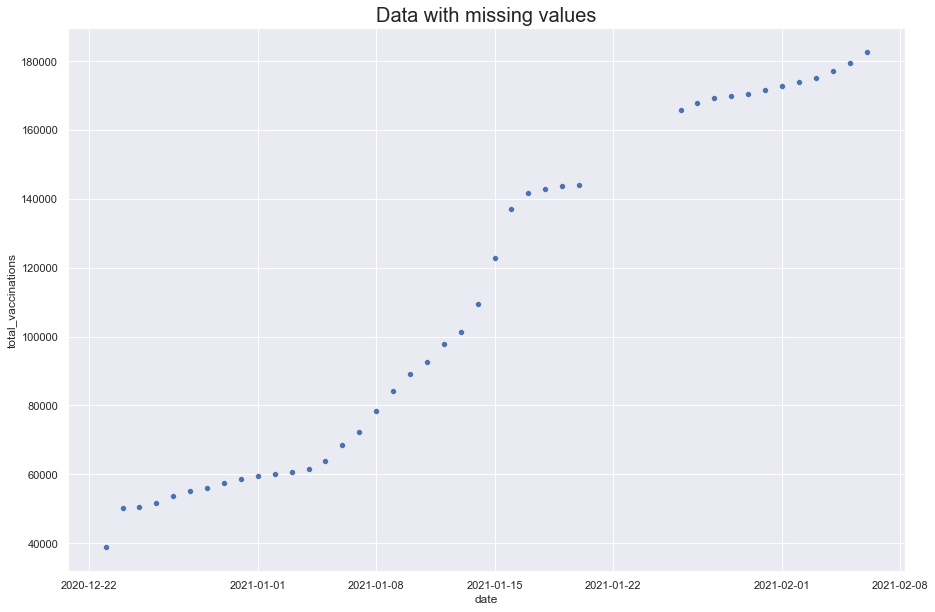

In [456]:
# 2
target_data = X_covid[X_covid.country == target_country].copy()

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Data with missing values', fontsize=20)
sns.scatterplot(x="date", y="total_vaccinations", data=target_data, ax=ax)
plt.show()

Прослеживается явная монотонная зависимость _total_vaccinations_ от _date_. Построим полиномиальную модель для заполнения пропусков

/home/hamit/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


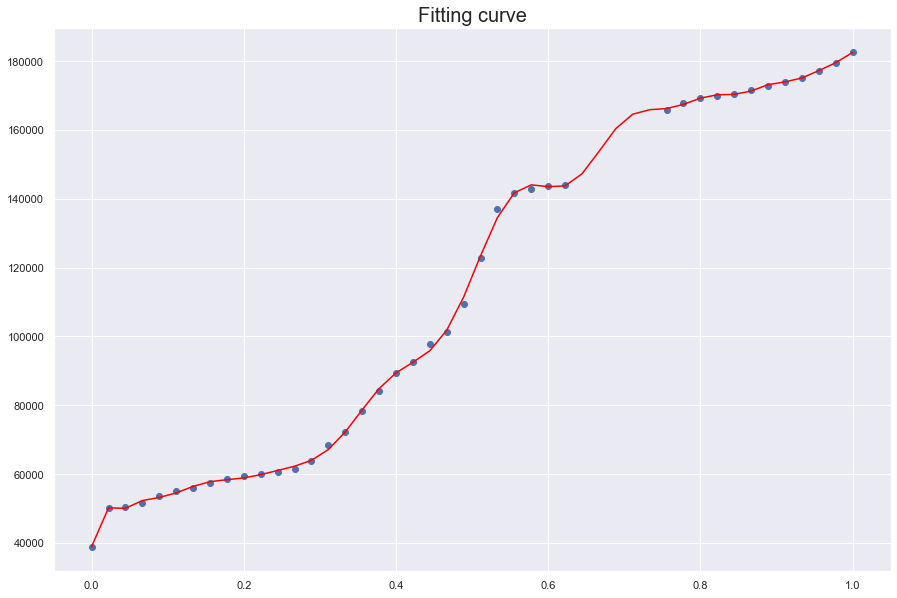

In [457]:
# 3

def norm_data(x, full_data=None):
    if full_data is None:
        full_data = x
    _min, _max = min(full_data), max(full_data)
    return (x - _min) / (_max - _min)

def reverse_norm(normalized_x, raw_data):
    _min, _max = min(raw_data), max(raw_data)
    return normalized_x * (_max - _min) + _min


target_data_full = target_data[['date', 'total_vaccinations']].dropna()

x = target_data_full.date.astype(int)
y = target_data_full.total_vaccinations
x_to_fit = norm_data(x)
y_to_fit = norm_data(y)

fit = np.poly1d(np.polyfit(
    x=x_to_fit,
    y=y_to_fit,
    deg=30
))

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Fitting curve', fontsize=20)

ax.scatter(x_to_fit, y)

date_norm = norm_data(target_data.date.astype(int))
fitted_values = fit(date_norm)

ax.plot(date_norm, reverse_norm(fitted_values, y), color='red')
plt.show()

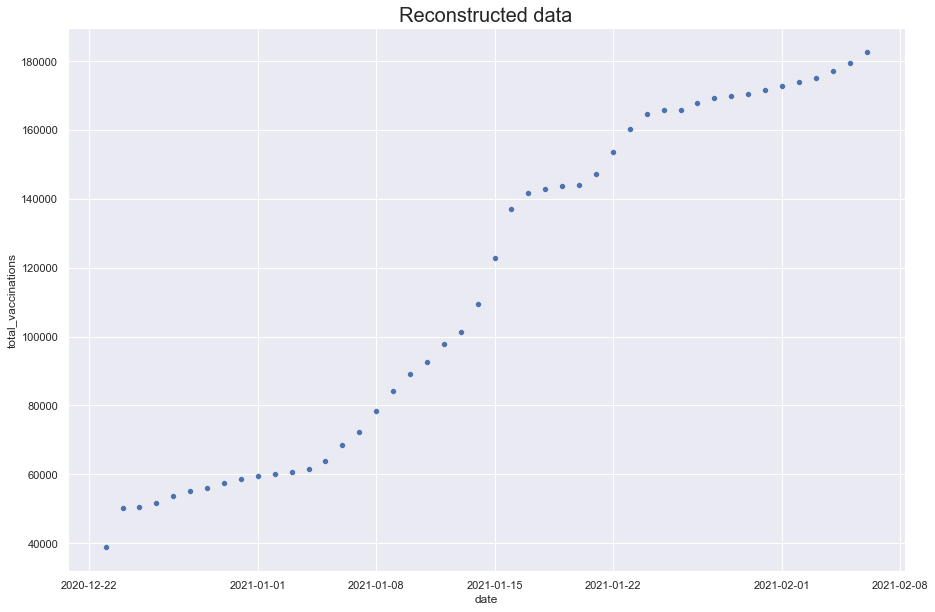

In [458]:
na_indxs = target_data.total_vaccinations.isna()

date_norm = norm_data(target_data[na_indxs].date.astype(int), x)
fitted_values = fit(date_norm)

target_data.loc[na_indxs, 'total_vaccinations'] = reverse_norm(fitted_values, y)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Reconstructed data', fontsize=20)
sns.scatterplot(x="date", y="total_vaccinations", data=target_data, ax=ax)
plt.show()

### Задание 4  (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


<b>Я считаю что выбросы отсутствуют, поскольку оба числовых признака имеют довольно кучные распределения, лежащие в разумных пределах. Категориальные признаки либо не допускают наличия выбросов, либо имеют очень большое количество маргинальных элементов, что не позволяет считать их выбросами.

### Задание 5  (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


In [459]:
one_hot_encoding = [
    'city',
    'gender',
    'major_discipline',
    'company_type',
]


label_encoding = {
    'relevent_experience': [
        'No relevent experience',
        'Has relevent experience',
    ],
    
    'enrolled_university': [
        'no_enrollment',
        'Part time course',
        'Full time course',
    ],
    
    'education_level': [
        'Primary School',
        'High School',
        'Graduate',
        'Masters',
        'Phd',
    ],
    
    'experience': 
        ['<1'] + [str(i) for i in range(1, 21)] + ['>20'],
    
    'company_size': [
        '<10',
        '10/49',
        '50-99',
        '100-500',
        '500-999',
        '1000-4999',
        '5000-9999',
        '10000+',
    ],
    
    'last_new_job':
        ['never'] + [str(i) for i in range(1, 5)] + ['>4'],
}


frequency_encoding = [] # сюда как будто ничего не просится

In [460]:
def encode(X, one_hot_encoding, label_encoding):
    
    X_encode = X.copy()
    
    
    # One-hot encoding
    for feature in one_hot_encoding:
        for value in sorted(X_encode[feature].unique()):
            X_encode[value] = (X_encode[feature] == value).astype(np.uint8)
            
        X_encode.drop(columns=feature, inplace=True)
    
    
    # Label encoding
    def label_value(label, labels_list):
        return labels_list.index(label)
    
    v_label_value = np.vectorize(label_value)
    v_label_value.excluded.add(1)
    
    for feature in label_encoding.keys():
        X_encode.loc[:, feature] = v_label_value(X_encode[feature], label_encoding[feature])
    
    return X_encode

In [465]:
X_hr_encode, y_hr_encode = encode(X_hr_fill, one_hot_encoding, label_encoding), y_hr_fill

In [466]:
X_hr_encode

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,city_1,city_10,...,Arts,Business Degree,Humanities,No Major,STEM,Early Stage Startup,Funded Startup,NGO,Public Sector,Pvt Ltd
enrollee_id,,,,,,,,,,,,,,,,,,,,,
8949,0.920,1,0,2,21,2,1,36.0,0,0,...,0,0,0,0,1,0,0,0,0,0
29725,0.776,0,0,2,15,2,5,47.0,0,0,...,0,0,0,0,1,0,0,0,0,1
666,0.767,1,0,3,21,2,4,8.0,0,0,...,0,0,0,0,1,0,1,0,0,0
28806,0.920,1,0,1,5,2,1,24.0,0,0,...,0,0,0,1,0,0,1,0,0,0
402,0.762,1,0,2,13,0,5,18.0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29754,0.920,1,0,2,7,1,1,25.0,0,0,...,0,0,1,0,0,0,1,0,0,0
7386,0.878,0,0,2,14,2,1,42.0,0,0,...,0,0,1,0,0,0,0,0,0,0
31398,0.920,1,0,2,14,2,4,52.0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Задание 6 (3.5 балла)

Выполните задание для датасета _hr_.




#### 1. (1 балл)
Реализуйте функцию undersampling

#### 2. (1 балл)
Реализуйте функцию oversampling

In [476]:
def undersampling(X, y):
    '''
    Возвращает данные, сбалансированные методом undersampling
    '''
    
    class_counts = list(zip(*np.unique(y, return_counts=True)))
    majority_class = max(class_counts, key=lambda x: x[1])[0]
    samples_to_remove = abs(class_counts[1][1] - class_counts[0][1])
    
    majority_class_index = y.index[y == majority_class]
    rows_to_remove = np.random.choice(
        majority_class_index,
        samples_to_remove,
        replace=False
    )
    
    X_under = X.drop(index=rows_to_remove)
    y_under = y.drop(index=rows_to_remove)
    
    return X_under, y_under


def oversampling(X, y):
    '''
    Возвращает данные, сбалансированные методом oversampling
    '''
    
    class_counts = list(zip(*np.unique(y, return_counts=True)))
    minority_class = min(class_counts, key=lambda x: x[1])[0]
    samples_to_add = abs(class_counts[1][1] - class_counts[0][1])
    
    minority_class_index = y.index[y == minority_class]
    rows_to_add = np.random.choice(
        minority_class_index,
        samples_to_add,
    )
    
    X_over = pd.concat([X, X.loc[rows_to_add]], axis=0)
    y_over = pd.concat([y, y.loc[rows_to_add]])
    
    return X_over, y_over

In [486]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_encode)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_encode)

#### 3. (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [232]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 167 kB 1.8 MB/s eta 0:00:01


In [496]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X_hr_encode, y_hr_encode)

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

Категориальные признаки не слишком наглядны, так что взглянем на численные

CITY_DEVELOPMENT_INDEX Distribution:

	Raw


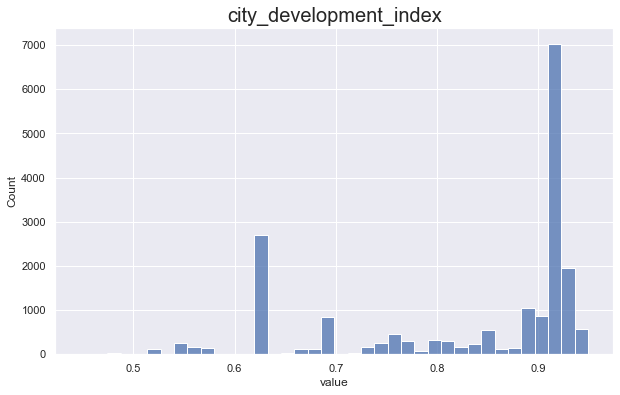

	Undersampling


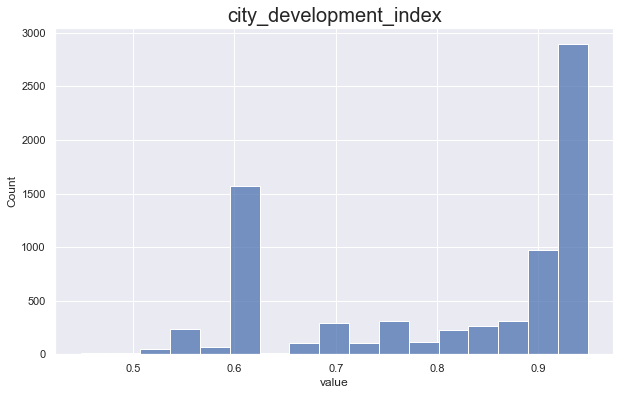

	Oversampling


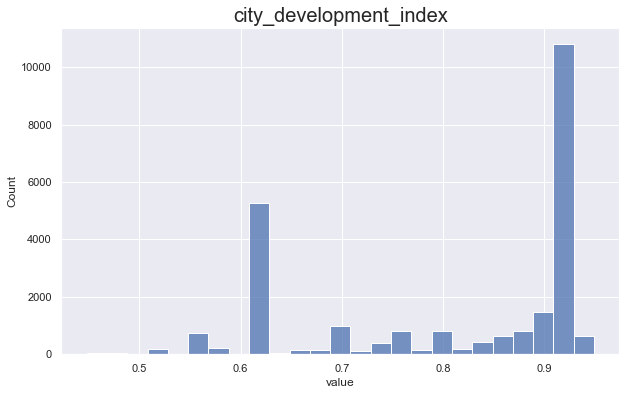

	SMOTE


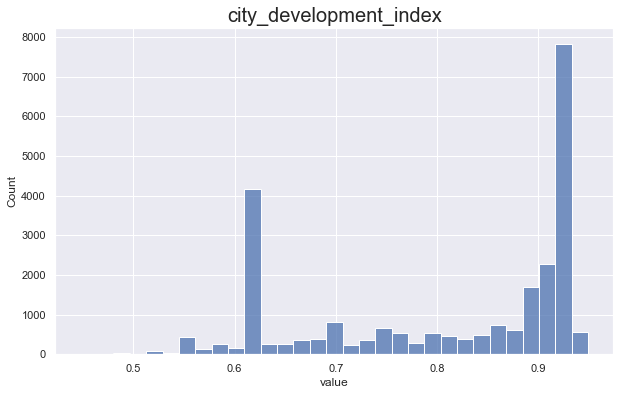




TRAINING_HOURS Distribution:

	Raw


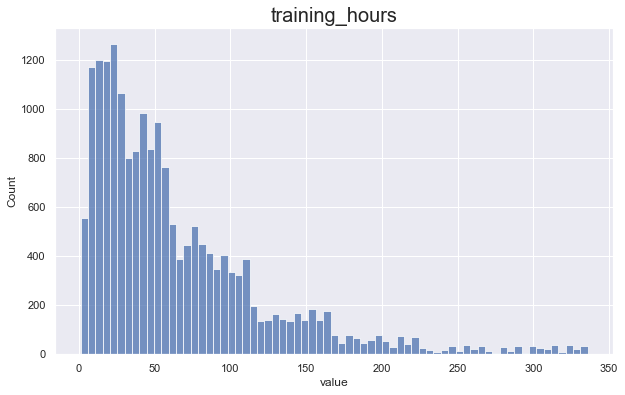

	Undersampling


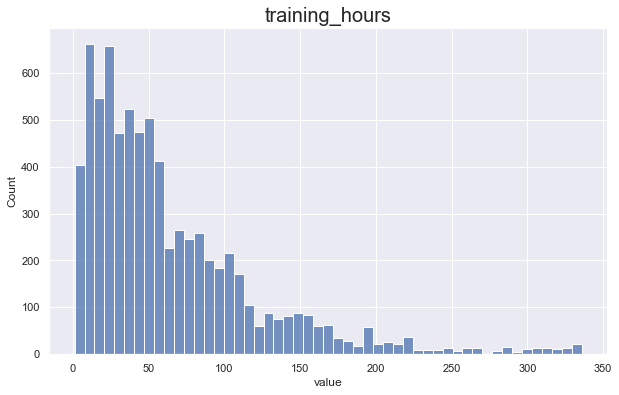

	Oversampling


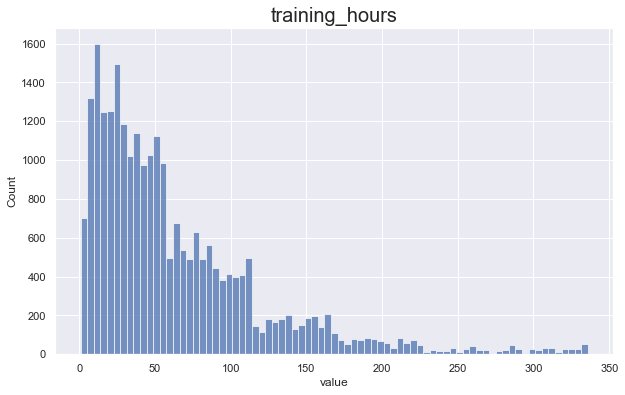

	SMOTE


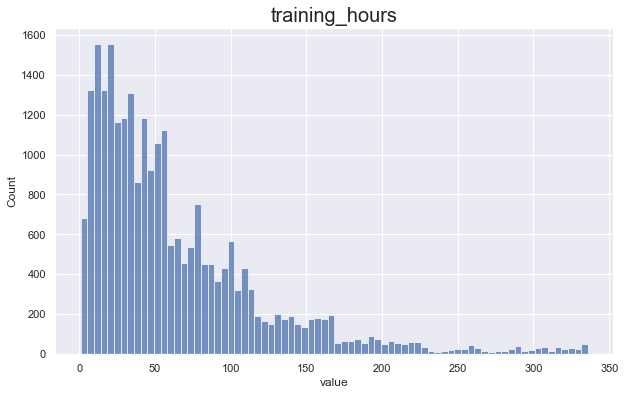

In [522]:
data = {
    'Raw': X_hr,
    'Undersampling': X_hr_under,
    'Oversampling': X_hr_over,
    'SMOTE': X_hr_SMOTE,
}

for feature in numeric_cols:
    print(f'{feature.upper()} Distribution:\n')
    for method in data.keys():
        print(f'\t{method}')
        numeric_features_statistic(data[method], [feature])
    print('\n\n')

Качественно распределения не изменяется (только размер выборки), что является хорошим знаком! При использовании SMOTE распределение выглядит разнообразнее, чего следовало ожидать.